<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimate the value of homes from fixed characteristics.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.




##   

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## 1. Size Matters!
### One variable tells 73% of the story: houses are worth about 68 dollars per total Square Foot (basement + living + garage space).
### Using only 6 variables, the fixed attributes of Size, Age, Location and Fireplaces account for 81% of house value.
### With 11 variables, a model can tell 88% of the story before doing any renovations: we gain an average of about 24k per house with fixed features other than size. 
## 2. Brain beats brawn!
### With only 12% of house value (19k) remaining to be described by other factors, finding ways to make money with repairs/renovations will be limited.
### If you really want to make money via  brawn, the biggest upside will come from:  (1)  add a garage if land permits (worth about 6k per car), (2) finish an unfinished basement (about 35 dollars/SF) and (3) upgrade the kitchen.
## 3. Brawn costs money!
### The boss will need to calculate the cost of these repairs/renovations to see if it's worth it. 
### The boss might prefer spending money on data scientists rather than construction workers: another example of computers stealing jobs.
###   



##    


##   


##        




## AGENDA



## Step 1: Load file, clean data and formats, segment data for training and testing


## Step 2: Set some initial hypotheses and explore data prior to regression modeling

## Step 3: Develop Models with Regression Analysis





##       


### Step 1: Load file, clean data and formats, segment data for training and testing.
#### The code used to identify cleaning issues is at the bottom of this notebook.

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# rename columns to eliminate numeric characters 
house.rename(columns = {'Condition1':'ConditionOne',
                        'Condition2':'ConditionTwo',
                        'Exterior1st':'ExteriorFrst',
                        'Exterior2nd':'ExteriorScnd',
                        'BsmtFinType1':'BsmtFinTypeOne',
                        'BsmtFinSF1':'BsmtFinSFOne',
                        'BsmtFinType2':'BsmtFinTypeTwo',
                        'BsmtFinSF2':'BsmtFinSFTwo',
                        '1stFlrSF':'FrstFlrSF',
                        '2ndFlrSF':'ScndFlrSF',
                        '3SsnPorch':'ThreeSsnPorch'}, inplace=True)

In [4]:
#house.columns
# ran this and then put names in list below
# needed to cut out u before each

In [5]:
column_names = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'ConditionOne',
       'ConditionTwo', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'ExteriorFrst', 'ExteriorScnd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinTypeOne', 'BsmtFinSFOne',
       'BsmtFinTypeTwo', 'BsmtFinSFTwo', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FrstFlrSF',
       'ScndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [ ]:
# used output of code below to populate master spreadsheet of column data
# for column in column_names:
#     print(column)
#     print(house[column].value_counts())

In [6]:
# delete all 10 rows that are commercial properties
house = house[house.MSZoning != 'C (all)']

In [7]:
# replace the 1369 null values in 'Alley' with 'None'
# this will allow creation of dummy variables later
house['Alley'].fillna('None',inplace=True)
# house['Alley'].isnull().sum()

In [8]:
# need to go with unknown for categorical of MasVnrType
# MasVnrArea more difficult because continuous variable
# Let's code as 0 just so cases will not be thrown out
# then, could go with Unknown for MasVnrType, but let's do None 
# this will match existing code plus not using for dummy anyway
row_list = [234,529,650,936,973,977,1243,1278]
for n in row_list:
    house.set_value(n,'MasVnrType','None')
    house.set_value(n,'MasVnrArea', 0.0)

In [9]:
# row 948 is NaN on BsmtExposure even though BsmtTotSF is 936 
# row 332 is NaN on BsmtFinTypeTwo even though BsmtTotSF is 1603
# Let's assign those values to be Unknown and Unknown
# then convert NaN on remaining Bsmt variables to NoBsmt since BsmtTotSF = 0

# DataFrame.set_value(index, col, value, takeable=False)[source]
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_value.html
house.set_value(948,'BsmtExposure','Unknown')
house.set_value(332,'BsmtFinTypeTwo','Unknown')

bsmtfix = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinTypeOne','BsmtFinTypeTwo']
for column in bsmtfix:
    house[column].fillna('NoBsmt',inplace=True) 

# print to see if it worked    
# for column in bsmtfix:
#     print(column)
#     print(house[column].value_counts())    

In [10]:
# for the one case of Electrical NaN, replace with Unknown
# allows for Dummy Variable later
house['Electrical'].fillna('Unknown',inplace=True)

In [11]:
# for FireplaceQu, replace 690 NaN with None
house['FireplaceQu'].fillna('None',inplace=True)

In [12]:
# set up list of Garage Variables to fix
# all 79 NaN are NoGarage
garagefix = ['GarageType','GarageYrBlt', 'GarageFinish', 
             'GarageQual','GarageCond']
for column in garagefix:
    house[column].fillna('NoGarage',inplace=True) 

In [13]:
# 1453 without a pool; only 7 with a pool
# will not analyze this variable but set to None anyway
house['PoolQC'].fillna('None',inplace=True)

In [14]:
# 1179 without a fence
house['Fence'].fillna('None',inplace=True)

In [15]:
# 1406 without a MiscFeature
house['MiscFeature'].fillna('None',inplace=True)

#### Create new variables. These were deterimined after EDA and initial models.
#### Should return and analyze/cut outliers.

In [16]:
house['LogSalePrice'] = np.log(house['SalePrice'])
house['LogGrLivArea'] = np.log(house['GrLivArea'])
house['HouseSF'] = house['GrLivArea'] + house['TotalBsmtSF']
house['LogHouseSF'] = np.log(house['HouseSF'])
house['TotalSF'] = house['GrLivArea'] + house['TotalBsmtSF'] + house['GarageArea']
house['LogTotalSF'] = np.log(house['TotalSF'])
house['NeighborhoodNice'] = house['Neighborhood'].copy()
house['NeighborhoodNice'] = house['NeighborhoodNice'].map(lambda x: 1 if x in 
                                                        ['StoneBr','NridgHt',
                                                         'Veenker','Somerst',
                                                         'Timber', 'Blmngtn'] else 0)
house['NeighborhoodYikes'] = house['Neighborhood'].copy()
house['NeighborhoodYikes'] = house['NeighborhoodYikes'].map(lambda x: 1 if x in 
                                                          ['Blueste','Edwards',
                                                           'MeadowV','BrDale',
                                                           'IDOTRR','OldTown',
                                                           'SWISU'] else 0)

In [ ]:
# house['LogSalePrice'].describe()
# repeat for all new variables for smell test

#### Set up dummy variables and lists of variables for subsequent analysis.

In [17]:
for col in column_names:
    if house[col].dtype == object:
#         print col
#         print house[col].dtype
        house[col].map(lambda x: col + '-' + str(x))
#         print house[col].map(lambda x: col + '-' + str(x))

In [18]:
house = pd.get_dummies(house)

In [ ]:
# house.info()
# print(house.columns[:100])
# print(house.columns[100:200])
# print(house.columns[200:])

In [19]:
# Fixed Attribute Dummy base cases:
house = house.drop('MSZoning_RL', axis=1)
house = house.drop('Alley_None', axis=1)
house = house.drop('LandContour_Lvl', axis=1)
house = house.drop('LotConfig_Inside', axis=1)
house = house.drop('Neighborhood_Blueste', axis=1)
house = house.drop('BldgType_1Fam', axis=1)


In [20]:
# fixed attributes with numeric values; including SalePrice
# Exclude LotFrontage due to missing values
fixed_num = ['KitchenAbvGr', 'EnclosedPorch', 'MoSold',
             'YrSold', 'ThreeSsnPorch', 'ScreenPorch', 
             'WoodDeckSF', 'OpenPorchSF', 'LotArea', 
             'BedroomAbvGr', 'ScndFlrSF', 'BsmtFinSFOne', 
             'Fireplaces', 'TotRmsAbvGrd', 'YearRemodAdd', 
             'YearBuilt', 'FrstFlrSF', 'TotalBsmtSF',
             'GarageCars', 'GarageArea', 'GrLivArea',
             'LogGrLivArea', 'LogSalePrice', 'SalePrice']
fixed_num = fixed_num[::-1]

In [21]:
# same as above only with SalePrice out; for x in regressions
fixed_num_x = ['KitchenAbvGr', 'EnclosedPorch', 'MoSold',
             'YrSold', 'ThreeSsnPorch', 'ScreenPorch', 
             'WoodDeckSF', 'OpenPorchSF', 'LotArea', 
             'BedroomAbvGr', 'ScndFlrSF', 'BsmtFinSFOne', 
             'Fireplaces', 'TotRmsAbvGrd', 'YearRemodAdd', 
             'YearBuilt', 'FrstFlrSF', 'TotalBsmtSF',
             'GarageCars', 'GarageArea', 'GrLivArea']
fixed_num_x = fixed_num_x[::-1] # reverse order for corr heat map

#### Prepare variables for question 2 regarding features to repair/renovate.

In [22]:
# drop one variable from each dummy to create base case
house = house.drop('RoofMatl_ClyTile', axis=1)
house = house.drop('ExteriorFrst_AsbShng', axis=1)
house = house.drop('ExteriorScnd_AsbShng', axis=1)
house = house.drop('MasVnrType_BrkCmn', axis=1)
house = house.drop('ExterQual_Fa', axis=1)
house = house.drop('ExterCond_Fa', axis=1)
house = house.drop('BsmtQual_Fa', axis=1)
house = house.drop('BsmtCond_Fa', axis=1)
house = house.drop('BsmtFinTypeOne_Unf', axis=1)
house = house.drop('BsmtFinTypeTwo_Unf', axis=1)
house = house.drop('HeatingQC_Fa', axis=1)
house = house.drop('CentralAir_N',  axis=1)
house = house.drop('Electrical_FuseF',  axis=1)
house = house.drop('KitchenQual_Fa', axis=1)
house = house.drop('Functional_Typ', axis=1)
house = house.drop('GarageType_NoGarage', axis=1)
house = house.drop('GarageFinish_NoGarage', axis=1)
house = house.drop('PavedDrive_N', axis=1)
house = house.drop('PoolQC_None', axis=1)
house = house.drop('Fence_None', axis=1)
house = house.drop('MiscFeature_None', axis=1)

In [23]:
# set up list for later use in regressions
# variables that survive after dummy cut
renov_num_x = ['OverallQual', 'OverallCond',
              'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'ExteriorFrst_AsphShn', 'ExteriorFrst_BrkComm',
       'ExteriorFrst_BrkFace', 'ExteriorFrst_CBlock',
       'ExteriorFrst_CemntBd', 'ExteriorFrst_HdBoard',
       'ExteriorFrst_ImStucc', 'ExteriorFrst_MetalSd',
       'ExteriorFrst_Plywood', 'ExteriorFrst_Stone', u'ExteriorFrst_Stucco',
       'ExteriorFrst_VinylSd', 'ExteriorFrst_Wd Sdng',
       'ExteriorFrst_WdShing',
       'ExteriorScnd_AsphShn', 'ExteriorScnd_Brk Cmn',
       'ExteriorScnd_BrkFace', 'ExteriorScnd_CBlock',
       'ExteriorScnd_CmentBd', 'ExteriorScnd_HdBoard',
       'ExteriorScnd_ImStucc', 'ExteriorScnd_MetalSd', 'ExteriorScnd_Other',
       'ExteriorScnd_Plywood', 'ExteriorScnd_Stone', 'ExteriorScnd_Stucco',
       'ExteriorScnd_VinylSd', 'ExteriorScnd_Wd Sdng',
       'ExteriorScnd_Wd Shng', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Ex', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_NoBsmt',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_NoBsmt',
       'BsmtCond_Po', 'BsmtCond_TA','BsmtFinTypeOne_ALQ', 'BsmtFinTypeOne_BLQ',
       'BsmtFinTypeOne_GLQ', 'BsmtFinTypeOne_LwQ', 'BsmtFinTypeOne_NoBsmt',
       'BsmtFinTypeOne_Rec', 'BsmtFinTypeTwo_ALQ',
       'BsmtFinTypeTwo_BLQ', 'BsmtFinTypeTwo_GLQ', 'BsmtFinTypeTwo_LwQ',
       'BsmtFinTypeTwo_NoBsmt', 'BsmtFinTypeTwo_Rec',
       'BsmtFinTypeTwo_Unknown',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseA',
       'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'Electrical_Unknown', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev',
       'FireplaceQu_Ex', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_None', 'FireplaceQu_Po',
       'FireplaceQu_TA', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 
       'GarageQual_Ex', 'GarageQual_Gd',
       'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Ex', 'GarageCond_Gd',
       'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Ex',
       'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC']

#### Segment out only those houses where SaleCondition = Normal for Questions 1 and 2.  
Further segment Normal into training set prior to 2010 sales and test set of 2010 sales.
#### We might use houses where SaleCondition = Partial for Question 2.
#### We will use houses where SaleCondition = Abnormal for Question 3.


In [ ]:
# test to see SaleCondition = 'Partial'
# based output of this code, we want to cut out houses that are "partial"
# return to this group possibly when calculating value of renovation 
# based on year built prior to YearRemodAdd
# house_Partial = house[house.SaleCondition == 'Partial']
# house_Partial.shape
# house_Partial[['YearBuilt','YearRemodAdd','YrSold','OverallQual','SaleCondition']]

In [24]:
# df for EDA
house_normal = house[house.SaleCondition_Normal == 1]
# house_normal.info()

In [25]:
# df for training
house_normal_trn = house_normal[house_normal.YrSold != 2010]
# house_normal_trn.info()

In [26]:
# hold out df for testing
house_normal_tst = house_normal[house_normal.YrSold == 2010]
# house_normal_tst.info()

### Step 2: Set some initial hypotheses and explore data prior to regression modeling

### Before looking at any of the data, here are some initial hypotheses regarding key drivers of SalePrice.
### Fixed attributes:  Size, age, location of the house likely to be the top three.
### "Renovate-able" attributes: Overall Quality, Kitchen Quality, Basement finished or not.
### Let's start with look at SalePrice and Fixed attributes, using EDA df (holdout + training).
### All house median price is 160k; mean is 175k implies right skew.
### Training and test set medians: 160k vs 156.45k. Means are: 175.332k vs 176.513. Standard deviations similiar: 69.617k vs 69.929k. We should now expect a bit of an "error" between the training and test sets due to different means and distributions.

In [27]:
# display base case of SalePrice
print("All houses:", house_normal['SalePrice'].describe())
print("Training set houses:", house_normal_trn['SalePrice'].describe())
print("Test set houses:", house_normal_tst['SalePrice'].describe())

('All houses:', count      1194.000000
mean     175485.225293
std       69629.229939
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205712.500000
max      755000.000000
Name: SalePrice, dtype: float64)
('Training set houses:', count      1040.000000
mean     175332.900000
std       69617.177043
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      755000.000000
Name: SalePrice, dtype: float64)
('Test set houses:', count       154.000000
mean     176513.915584
std       69929.191569
min       55000.000000
25%      130125.000000
50%      156450.000000
75%      211500.000000
max      538000.000000
Name: SalePrice, dtype: float64)


### SalePrice skews right and has a high peak. Set up a new variable of log SalePrice for detailed model.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


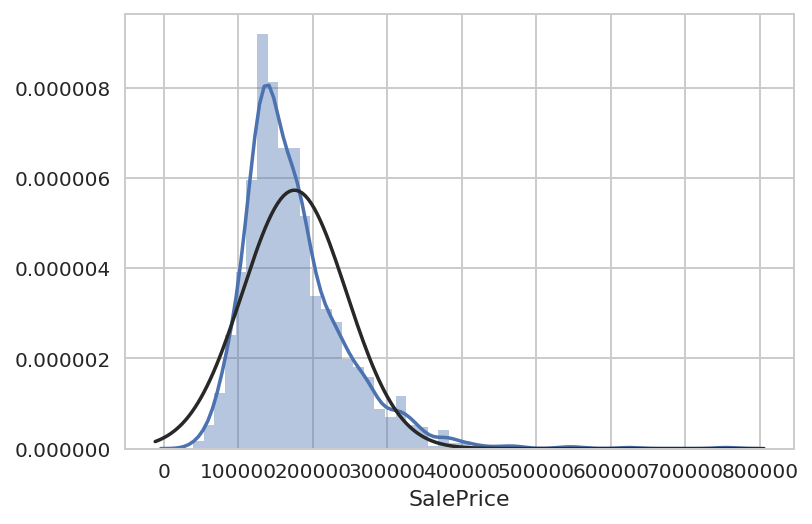

In [28]:
from scipy.stats import norm
sns.distplot(house_normal['SalePrice'], fit=norm)

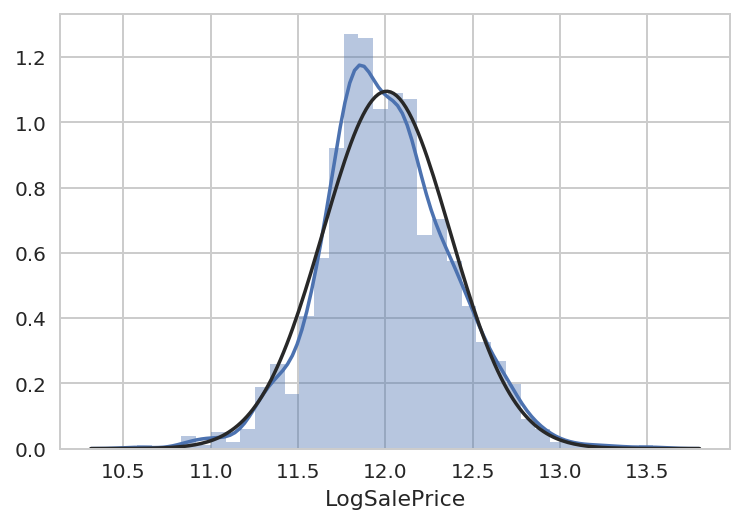

In [29]:
sns.distplot(house_normal['LogSalePrice'], fit=norm)

### SalePrice has high correlation coefficients with size, garage space, age, fireplaces and year remodeled.

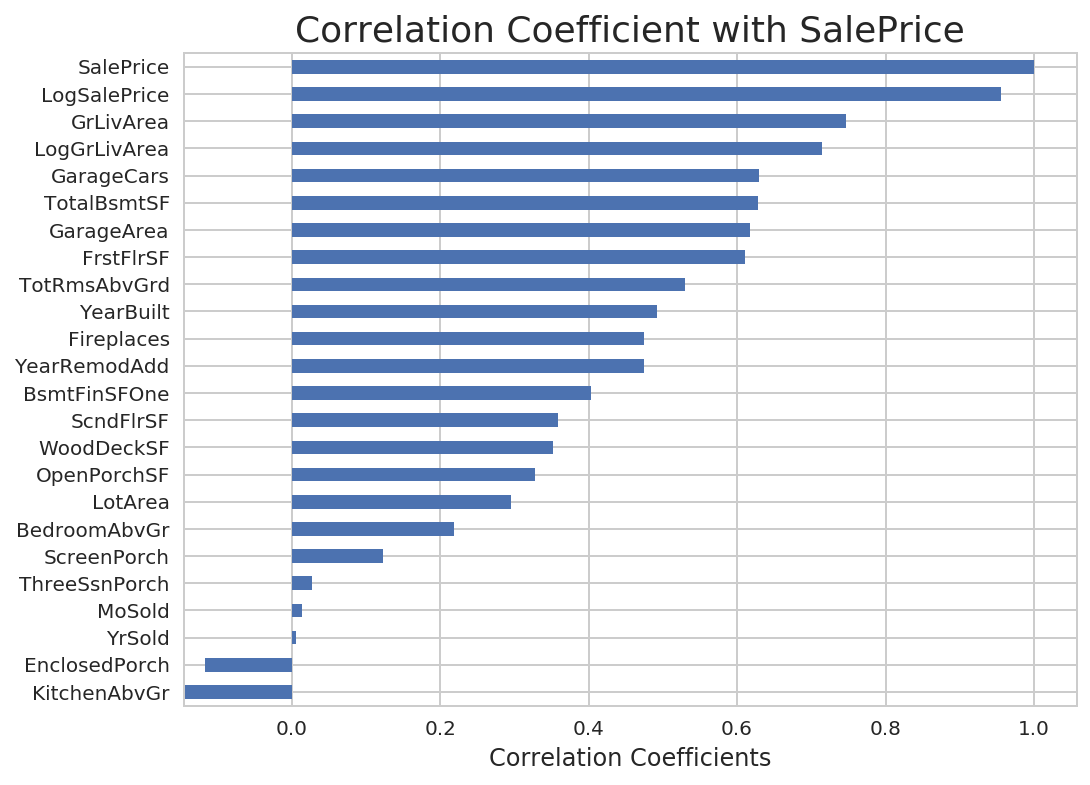

In [30]:
# output a simple bar chart of correlations with SalePrice
house_normal_fixed_num_corr = house_normal[fixed_num].corr()
fig, ax = plt.subplots(figsize=(8,6))
ax = house_normal_fixed_num_corr['SalePrice'].sort_values(ascending=True).plot.barh()
ax.set_xlabel('Correlation Coefficients', fontsize=12)
ax.set_title('Correlation Coefficient with SalePrice', fontsize=18)
plt.show()

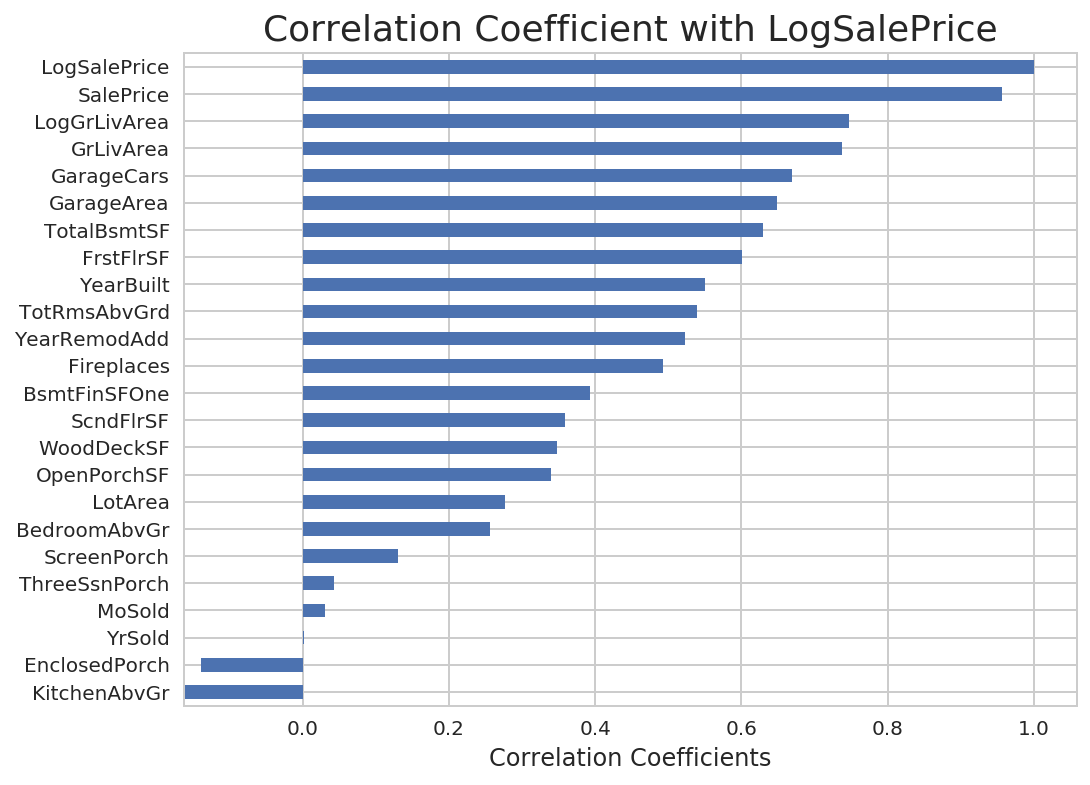

In [31]:
# output a simple bar chart of correlations with LogSalePrice
house_normal_fixed_num_corr = house_normal[fixed_num].corr()
fig, ax = plt.subplots(figsize=(8,6))
ax = house_normal_fixed_num_corr['LogSalePrice'].sort_values(ascending=True).plot.barh()
ax.set_xlabel('Correlation Coefficients', fontsize=12)
ax.set_title('Correlation Coefficient with LogSalePrice', fontsize=18)
plt.show()

### Based on cross correlation matrix and subsequent display of highest cross correlation coefficients, we can start to collapse and reduce variables for a simple model.

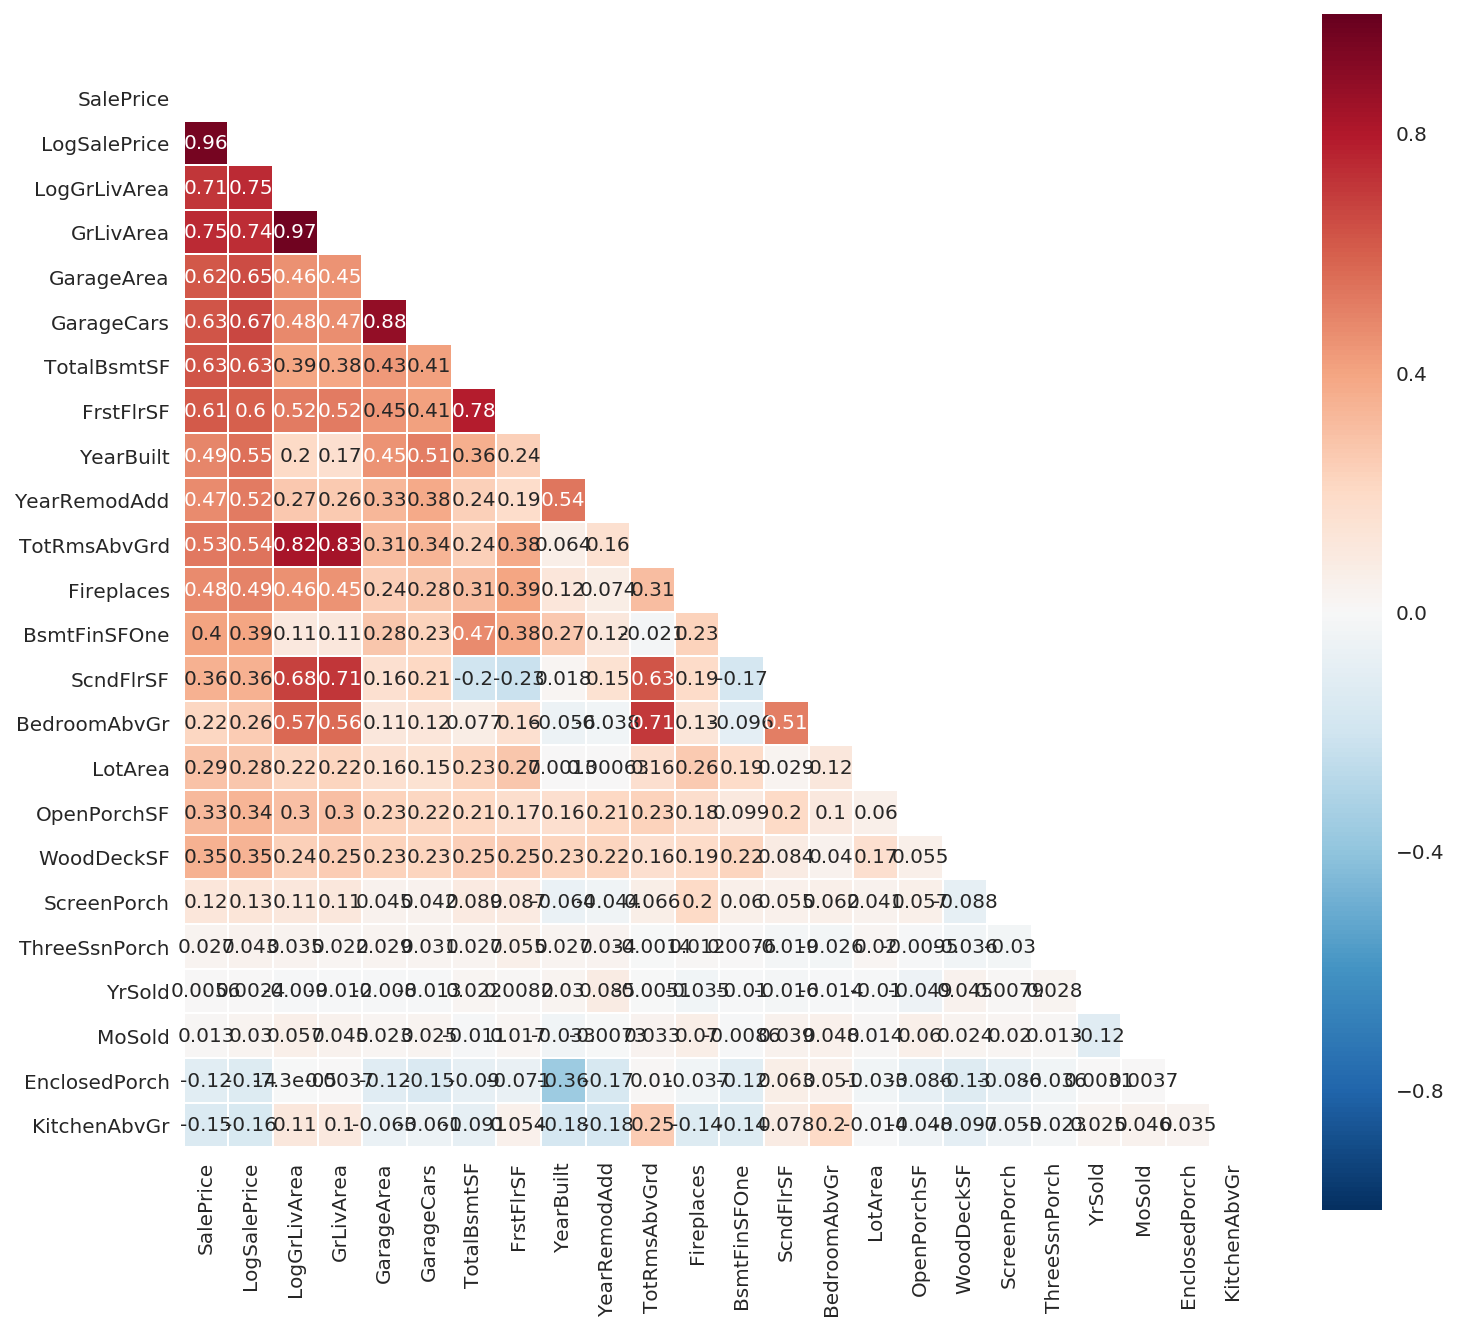

In [32]:
# http://stackoverflow.com/questions/38913965/
# make-the-size-of-a-heatmap-bigger-with-seaborn
# house_normal_fixed_num_corr = house_normal[fixed_num].corr() # already done above
mask = np.zeros_like(house_normal_fixed_num_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12,11))         # Sample figsize in inches
    ax = sns.heatmap(house_normal_fixed_num_corr, mask=mask, square=True, annot=True, linewidths=0.5)


In [33]:
# http://stackoverflow.com/questions/17778394/
# list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# found this code on stackoverflow when working with son, Jimmy, on his math project
# extremely cool and helpful

def get_redundant_pairs(df):
   '''Get diagonal and lower triangular pairs of correlation matrix'''
   pairs_to_drop = set()
   cols = df.columns
   for i in range(0, df.shape[1]):
       for j in range(0, i+1):
           pairs_to_drop.add((cols[i], cols[j]))
   return pairs_to_drop

def get_top_abs_correlations(df, n=5):
   au_corr = df.corr().abs().unstack()
   labels_to_drop = get_redundant_pairs(df)
   au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
   return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(house_normal[fixed_num], 20))


Top Absolute Correlations
LogGrLivArea  GrLivArea       0.973797
SalePrice     LogSalePrice    0.955782
GarageArea    GarageCars      0.880347
GrLivArea     TotRmsAbvGrd    0.830594
LogGrLivArea  TotRmsAbvGrd    0.824617
TotalBsmtSF   FrstFlrSF       0.784890
LogSalePrice  LogGrLivArea    0.747606
SalePrice     GrLivArea       0.746598
LogSalePrice  GrLivArea       0.737588
SalePrice     LogGrLivArea    0.714287
GrLivArea     ScndFlrSF       0.712298
TotRmsAbvGrd  BedroomAbvGr    0.705114
LogGrLivArea  ScndFlrSF       0.681979
LogSalePrice  GarageCars      0.668814
              GarageArea      0.648938
SalePrice     GarageCars      0.629672
TotRmsAbvGrd  ScndFlrSF       0.629651
LogSalePrice  TotalBsmtSF     0.628906
SalePrice     TotalBsmtSF     0.628759
              GarageArea      0.617576
dtype: float64


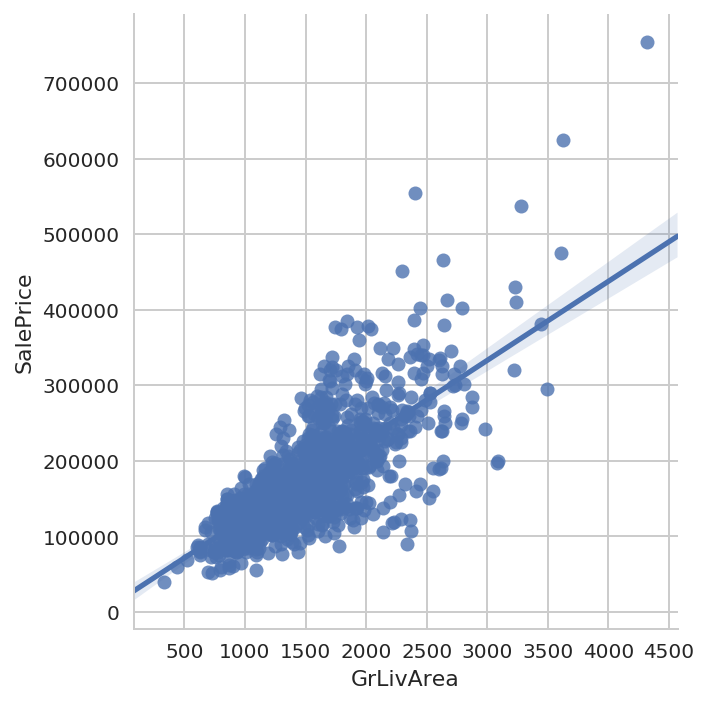

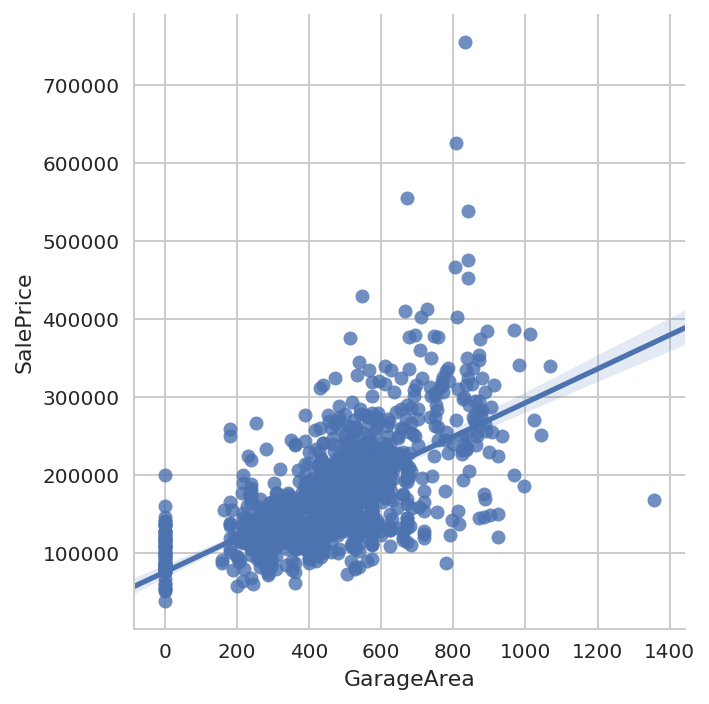

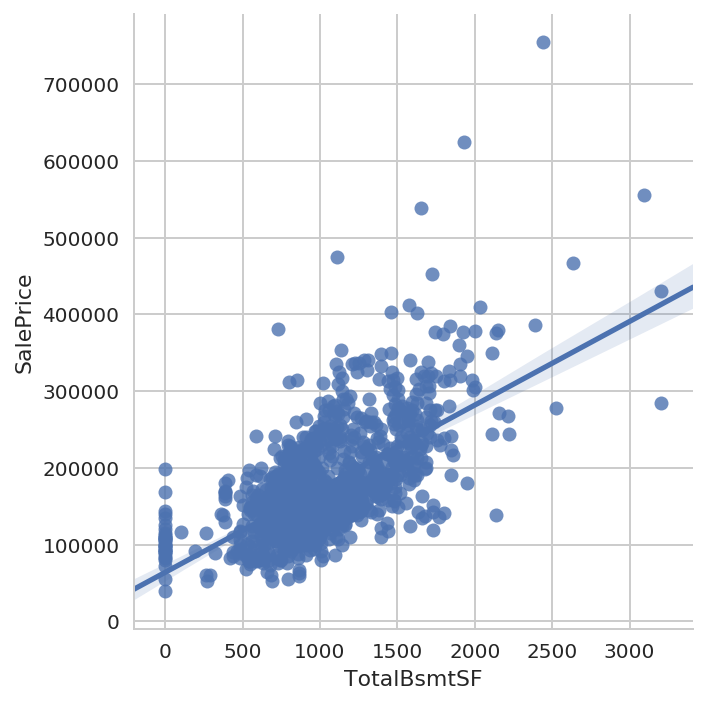

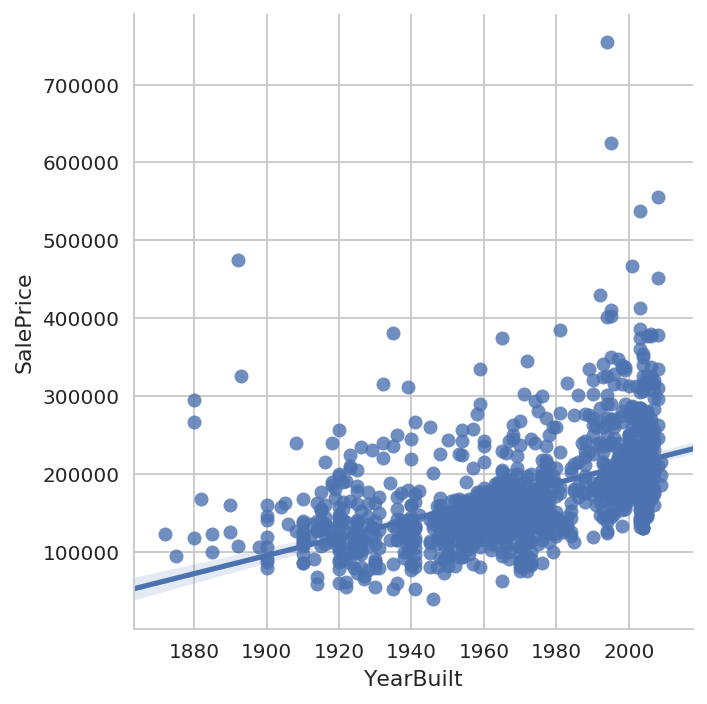

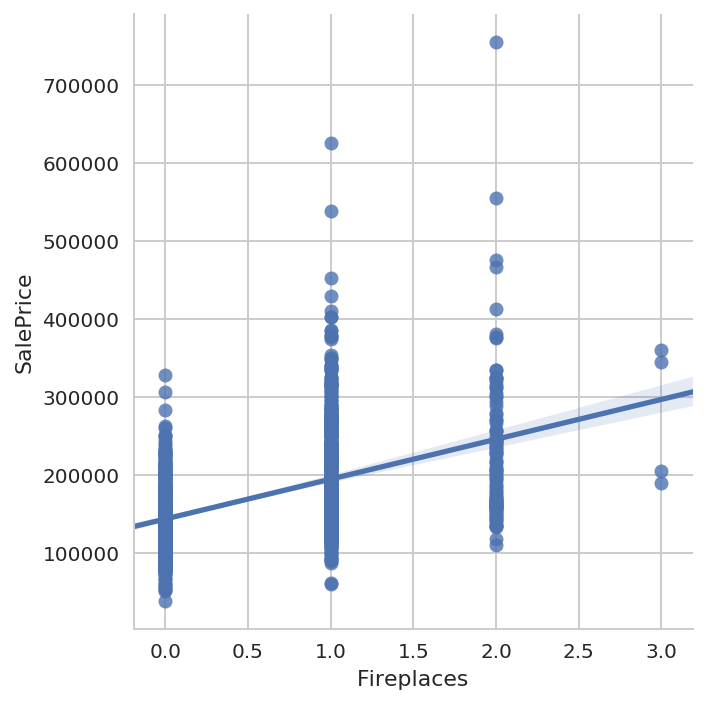

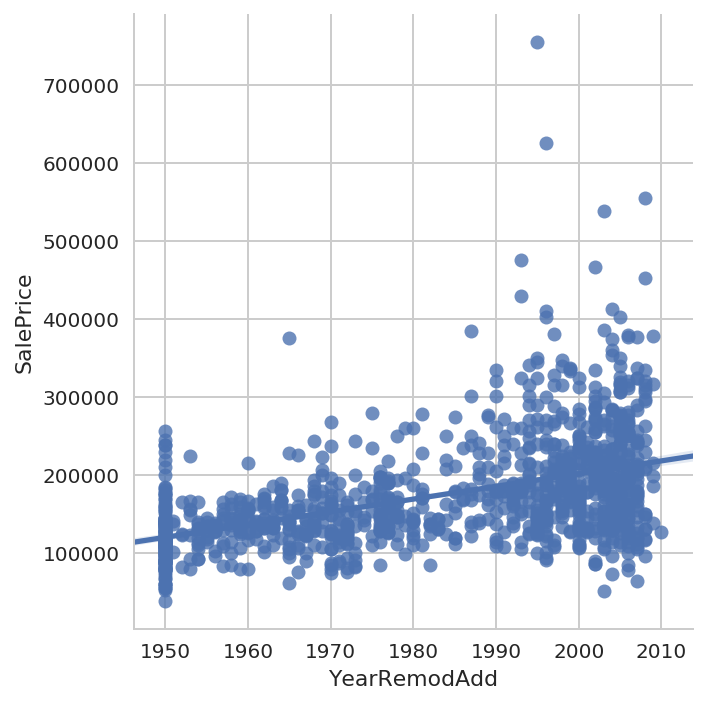

In [34]:
# per cross-validation-train-test-split-solutions:
# it's good practice to plot variable vs target to confirm relationship visually
sns.lmplot(x='GrLivArea', y='SalePrice', data=house_normal)
plt.show()
sns.lmplot(x='GarageArea', y='SalePrice', data=house_normal)
plt.show()
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=house_normal)
plt.show()
sns.lmplot(x='YearBuilt', y='SalePrice', data=house_normal)
plt.show()
sns.lmplot(x='Fireplaces', y='SalePrice', data=house_normal)
plt.show()
sns.lmplot(x='YearRemodAdd', y='SalePrice', data=house_normal)
plt.show()

#### Houses over 384k are more than 3 standard deviations away from the mean. Ok to keep them in for simple model.  But, look again after changing to log of SalePrice.  Also, looks like we should do log of GrLivArea as well for detailed model.  Keep them as is for simple model.  Make four new variables as well: HouseSF = GrLivArea+TotBsmtSF, logHouseSF, LivePlusBsmtPlusGarageSF = TotalSF, logTotalSF

## Step 3: Develop Models with Regression Analysis

### One variable (GrLivArea) has .56 R squared:  105 dollars/SF of living space

In [35]:
# start simple: single variable
import patsy
import statsmodels.api as sm


formula = 'SalePrice ~ GrLivArea'

y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1318.
Date:                Wed, 10 May 2017   Prob (F-statistic):          5.84e-187
Time:                        12:55:27   Log-Likelihood:                -12646.
No. Observations:                1040   AIC:                         2.530e+04
Df Residuals:                    1038   BIC:                         2.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.842e+04   4553.743      4.045      0.000    9482.512    2.74e+04
GrLivArea    105.1671      2.897     36.304      0.000      99.483     110.851
==============================================================================
Omnibus:                      194.726   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              987.901
Skew:                           0.765   Prob(JB):                    3.02e-215
Kurtosis:                       7.523   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Size Matters! One newly created variable (TotalSF) has .73 R squared: 68 dollars per square foot of total space (living, basement, garage).

In [36]:
formula = 'SalePrice ~ TotalSF'
y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')
y = y.values.ravel()
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2824.
Date:                Wed, 10 May 2017   Prob (F-statistic):          2.04e-298
Time:                        12:55:36   Log-Likelihood:                -12389.
No. Observations:                1040   AIC:                         2.478e+04
Df Residuals:                    1038   BIC:                         2.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.737e+04   3975.265     -6.884      0.000   -3.52e+04   -1.96e+04
TotalSF       68.1484      1.282     53.142      0.000      65.632      70.665
==============================================================================
Omnibus:                      157.629   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1357.634
Skew:                           0.398   Prob(JB):                    1.56e-295
Kurtosis:                       8.540   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Just 6 variables provide .81 R squared: Size, Age (Built, Remodeled), Location (Nice, Yikes), Fireplaces. 
### Subtract 193 dollars per year old of house and 554 dollars per year since renovation.
### Add 15k per house in Nice neighbordhood. Subtract 8k per house in Yikes neighborhood.

In [37]:
formula = 'SalePrice ~ YearBuilt + YearRemodAdd + TotalSF + Fireplaces +\
NeighborhoodNice + NeighborhoodYikes'

y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')
y = y.values.ravel()
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     711.0
Date:                Wed, 10 May 2017   Prob (F-statistic):               0.00
Time:                        12:55:49   Log-Likelihood:                -12222.
No. Observations:                1040   AIC:                         2.446e+04
Df Residuals:                    1033   BIC:                         2.449e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.474e+06   1.12e+05    -13.189      0.000   -1.69e+06   -1.25e+06
YearBuilt           192.8213     45.441      4.243      0.000     103.654     281.989
YearRemodAdd        554.4317     57.586      9.628      0.000     441.433     667.430
TotalSF              53.8601      1.347     39.982      0.000      51.217      56.504
Fireplaces         1.424e+04   1691.829      8.415      0.000    1.09e+04    1.76e+04
NeighborhoodNice   1.518e+04   3140.727      4.834      0.000    9020.795    2.13e+04
NeighborhoodYikes -8059.1787   2768.360     -2.911      0.004   -1.35e+04   -2626.927
==============================================================================
Omnibus:                      493.673   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9364.113
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                      17.296   Cond. No.                     4.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Doubling to 12 variables only increases R Squared to .85.  
### Let's review new variables and coefficients.  
### Losing ability to have sound bites for the boss! 

In [38]:
formula = 'SalePrice ~ LotArea + YearBuilt + YearRemodAdd + TotalBsmtSF + BsmtFinSFOne +\
GrLivArea + BedroomAbvGr + KitchenAbvGr\
+ Fireplaces + GarageArea + \
NeighborhoodNice + NeighborhoodYikes'

y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 10 May 2017   Prob (F-statistic):               0.00
Time:                        12:57:38   Log-Likelihood:                -12101.
No. Observations:                1040   AIC:                         2.423e+04
Df Residuals:                    1027   BIC:                         2.429e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.219e+06   1.06e+05    -11.550      0.000   -1.43e+06   -1.01e+06
LotArea               0.4340      0.082      5.314      0.000       0.274       0.594
YearBuilt           223.2367     42.532      5.249      0.000     139.777     306.696
YearRemodAdd        416.7855     53.179      7.837      0.000     312.433     521.138
TotalBsmtSF          28.6273      2.769     10.337      0.000      23.193      34.062
BsmtFinSFOne         20.8749      2.470      8.451      0.000      16.028      25.722
GrLivArea            81.7217      2.798     29.211      0.000      76.232      87.211
BedroomAbvGr      -8807.3307   1431.744     -6.151      0.000   -1.16e+04   -5997.853
KitchenAbvGr        -3.1e+04   4645.335     -6.674      0.000   -4.01e+04   -2.19e+04
Fireplaces         6151.8314   1602.325      3.839      0.000    3007.626    9296.037
GarageArea           35.8346      5.543      6.465      0.000      24.958      46.711
NeighborhoodNice    1.65e+04   2897.025      5.694      0.000    1.08e+04    2.22e+04
NeighborhoodYikes -9649.7515   2513.161     -3.840      0.000   -1.46e+04   -4718.235
==============================================================================
Omnibus:                      421.199   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7301.387
Skew:                           1.398   Prob(JB):                         0.00
Kurtosis:                      15.676   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using LogSalePrice, R squared is up to .88 with same 12 variables (less BedroomAbvGr which had high p Value).  
### However, this comes at a cost: LogSalePrice make results difficult to explain coefficients without a tansformation.  (Need some help to do this)!

In [39]:
formula = 'LogSalePrice ~ LotArea + YearBuilt + YearRemodAdd + TotalBsmtSF + BsmtFinSFOne +\
GrLivArea + KitchenAbvGr\
+ Fireplaces + GarageArea + \
NeighborhoodNice + NeighborhoodYikes'

y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     688.4
Date:                Wed, 10 May 2017   Prob (F-statistic):               0.00
Time:                        12:58:39   Log-Likelihood:                 680.62
No. Observations:                1040   AIC:                            -1337.
Df Residuals:                    1028   BIC:                            -1278.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2109      0.480      4.607      0.000       1.269       3.153
LotArea             1.68e-06   3.75e-07      4.482      0.000    9.45e-07    2.42e-06
YearBuilt             0.0015      0.000      7.465      0.000       0.001       0.002
YearRemodAdd          0.0031      0.000     13.035      0.000       0.003       0.004
TotalBsmtSF           0.0001   1.27e-05     10.686      0.000       0.000       0.000
BsmtFinSFOne       9.214e-05   1.13e-05      8.173      0.000       7e-05       0.000
GrLivArea             0.0004   1.05e-05     33.347      0.000       0.000       0.000
KitchenAbvGr         -0.1685      0.021     -7.928      0.000      -0.210      -0.127
Fireplaces            0.0562      0.007      7.705      0.000       0.042       0.070
GarageArea            0.0002   2.54e-05      9.374      0.000       0.000       0.000
NeighborhoodNice      0.0708      0.013      5.422      0.000       0.045       0.096
NeighborhoodYikes    -0.0965      0.012     -8.380      0.000      -0.119      -0.074
==============================================================================
Omnibus:                      129.983   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.378
Skew:                          -0.645   Prob(JB):                     2.77e-80
Kurtosis:                       5.606   Cond. No.                     1.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### This one has problems, but it shows methodology for continuing to cross validation.

In [40]:
import patsy
import statsmodels.api as sm


formula = 'SalePrice ~ LotArea + YearBuilt + YearRemodAdd + TotalBsmtSF + BsmtFinSFOne +\
FrstFlrSF + ScndFlrSF + GrLivArea + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd \
+ Fireplaces + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch +\
ThreeSsnPorch + ScreenPorch + MoSold + YrSold + NeighborhoodNice + NeighborhoodYikes'

y, X = patsy.dmatrices(formula, data=house_normal_trn, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     248.3
Date:                Wed, 10 May 2017   Prob (F-statistic):               0.00
Time:                        12:58:49   Log-Likelihood:                -12089.
No. Observations:                1040   AIC:                         2.423e+04
Df Residuals:                    1016   BIC:                         2.434e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.005e+06   1.55e+06     -0.648      0.517   -4.05e+06    2.04e+06
LotArea               0.4349      0.082      5.312      0.000       0.274       0.596
YearBuilt           212.8853     45.642      4.664      0.000     123.321     302.449
YearRemodAdd        390.3814     53.717      7.267      0.000     284.973     495.790
TotalBsmtSF          30.2005      3.773      8.004      0.000      22.797      37.604
BsmtFinSFOne         20.3811      2.491      8.183      0.000      15.494      25.269
FrstFlrSF            33.5290     18.782      1.785      0.075      -3.327      70.385
ScndFlrSF            37.9456     18.303      2.073      0.038       2.029      73.862
GrLivArea            42.3044     18.317      2.310      0.021       6.362      78.247
BedroomAbvGr      -9308.8714   1646.213     -5.655      0.000   -1.25e+04   -6078.506
KitchenAbvGr      -2.991e+04   4894.670     -6.111      0.000   -3.95e+04   -2.03e+04
TotRmsAbvGrd        443.5430   1186.675      0.374      0.709   -1885.070    2772.156
Fireplaces         5007.8879   1642.146      3.050      0.002    1785.501    8230.274
GarageCars         4809.7507   2690.830      1.787      0.074    -470.470    1.01e+04
GarageArea           21.5723      9.205      2.343      0.019       3.509      39.636
WoodDeckSF           17.5150      7.480      2.342      0.019       2.837      32.193
OpenPorchSF          26.5073     14.180      1.869      0.062      -1.318      54.332
EnclosedPorch        24.6214     15.560      1.582      0.114      -5.911      55.154
ThreeSsnPorch        -4.5686     28.311     -0.161      0.872     -60.123      50.986
ScreenPorch          40.5257     15.748      2.573      0.010       9.624      71.428
MoSold             -187.5394    323.072     -0.580      0.562    -821.505     446.426
YrSold              -70.4731    774.586     -0.091      0.928   -1590.443    1449.497
NeighborhoodNice   1.628e+04   2904.823      5.605      0.000    1.06e+04     2.2e+04
NeighborhoodYikes  -1.02e+04   2543.820     -4.009      0.000   -1.52e+04   -5205.324
==============================================================================
Omnibus:                      446.912   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8261.516
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                      16.479   Cond. No.                     2.86e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Switch to scikit to see if same variables generate same R Squared.  Trade-off when going to scikit is loss of easy to read output on coefficients.

In [41]:
# This worked! R squared matches patsy and statsmodel version from above!
# code from linear-regression-object-oriented-programming-solutions
# Ask Tim how this differs from version above which causes an error

#  create a new list of x to send into this model simple_num = []

fixed_num_x.extend(['NeighborhoodNice', 'NeighborhoodYikes'])
X = house_normal_trn[fixed_num_x].values
y = house_normal_trn[["SalePrice"]].values 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.84898513991055868

### Time to cross-validate.

Cross-validated scores: [ 0.82620933  0.87498423  0.84189474  0.79247626  0.79136008]
Cross-Predicted R2: 0.830078924194


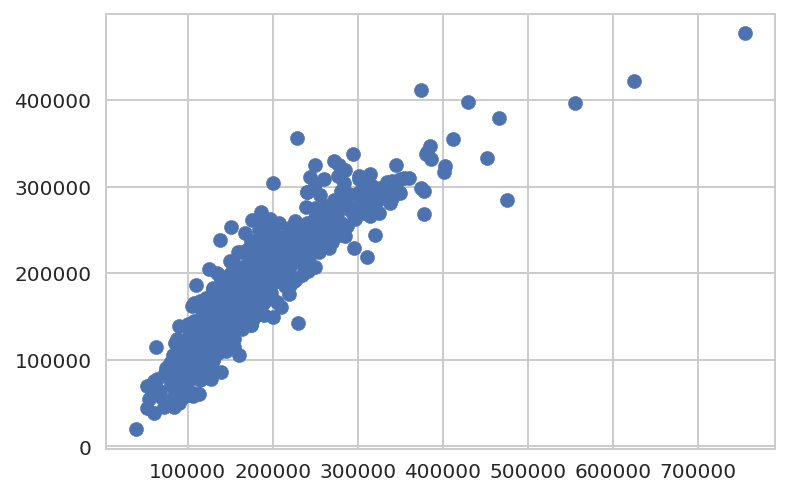

In [42]:
# from cross-validation-train-test-split-solutions:
# k-fold cross validation
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# code below is using X,y from cell above, copied and commented below for reference
# house_normal_trn_with_target = house_normal_trn.copy()
# house_normal_trn_with_target['SalePrice'] = y
# X = house_normal_trn[fixed_num_x]


# Perform 5-fold cross validation
scores = cross_val_score(lr, X, y, cv=5)
print "Cross-validated scores:", scores

# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X, y, cv=5)
plt.scatter(y, predictions)

# manually calcualte the r2
r2 = metrics.r2_score(y, predictions)
print "Cross-Predicted R2:", r2

### We return to the holdout dataset.  On the one hand, it's exciting to see it worked: R squared training model on hold out data is .89. On the other hand, I need help understanding why/how this code worked.

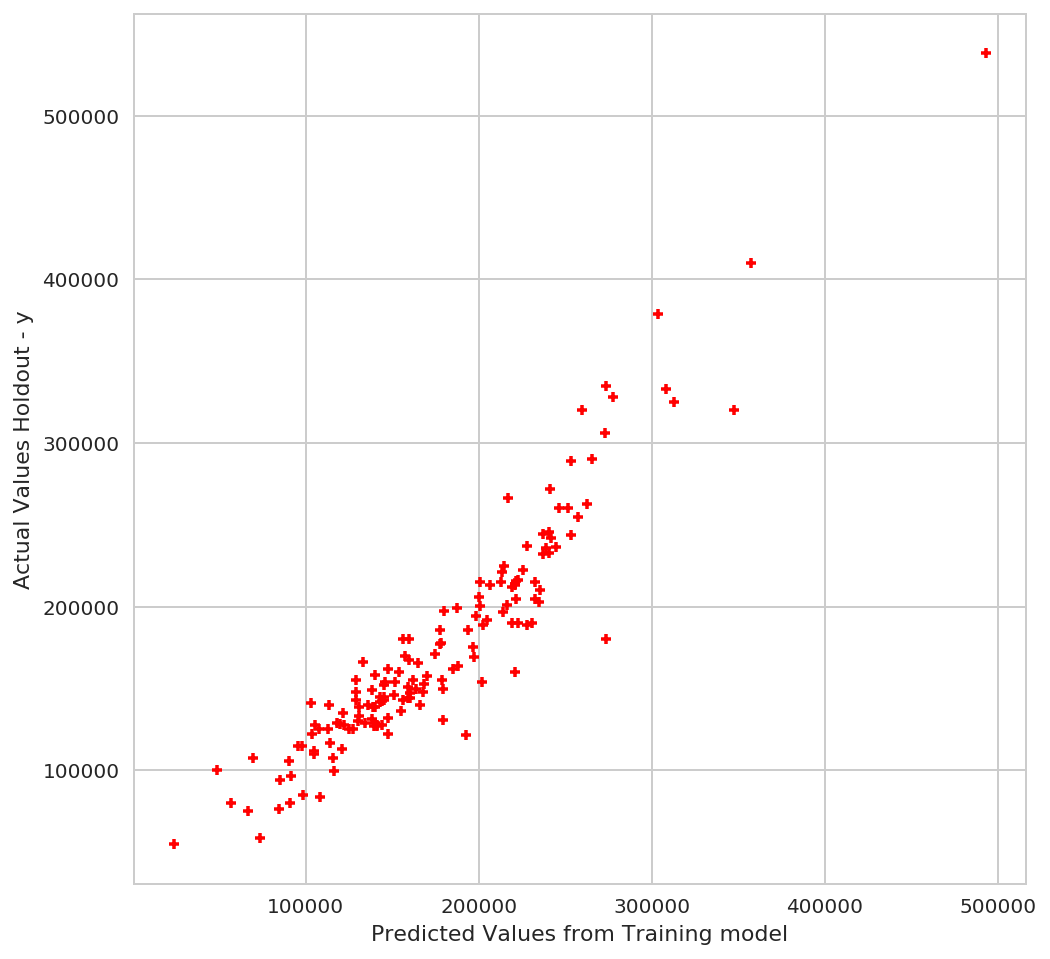

score:  0.884281204979


In [43]:
from sklearn import linear_model

lm = linear_model.LinearRegression()


# X = df[["RM","LSTAT"]].values
# y = target 
y = house_normal_tst['SalePrice']
X = house_normal_tst[fixed_num_x].values

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Training model")
plt.ylabel("Actual Values Holdout - y")
plt.show()

print "score: ", score

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### Lasso allows a very complicated model.    Good news is R squared jumps to .92.  Bad news is that interpreting output is difficult. 
### Added bad news for the construction crews is limited upside from renovations.  
### We are more likely to make money from an underpriced house than from one that is priced right but needs renovations.

In [44]:
fixed_renov_num_x = fixed_num_x + renov_num_x

In [45]:
fixed_renov_log_num_x = fixed_renov_num_x + ['LogGrLivArea']

In [46]:
# code for Lasso from kobe-shots-made-regularization-lab-solutions

# y = house_normal_trn.SalePrice.values 
# X = house_normal_trn[fixed_renov_num_x]

y = house_normal_trn.LogSalePrice.values
X = house_normal_trn[fixed_renov_log_num_x]
#     .iloc[:,1:] # from kobe lab

# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

# Standardization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.

In [47]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00221476491902


....................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


In [48]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.93831144  0.92935284  0.934065    0.91742209  0.96039084  0.91591387
  0.92645028  0.91308774  0.90630717  0.92622942]
0.926753069609


In [49]:
lasso.fit(Xs, y)

Lasso(alpha=0.0022147649190218787, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
149,0.087220,0.087220,LogGrLivArea
23,0.061567,0.061567,OverallQual
0,0.059982,0.059982,GrLivArea
5,0.047005,0.047005,YearBuilt
24,0.046104,0.046104,OverallCond
3,0.036932,0.036932,TotalBsmtSF
22,0.036225,-0.036225,NeighborhoodYikes
9,0.036053,0.036053,BsmtFinSFOne
12,0.024150,0.024150,LotArea
1,0.024071,0.024071,GarageArea


In [51]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0])

Percent variables zeroed out: 0.0682692307692


## 1. Size Matters!
### One variable tells 73% of the story: houses are worth about 68 dollars per total Square Foot (basement + living + garage space).
### Using only 6 variables, the fixed attributes of Size, Age, Location and Fireplaces account for 81% of house value.
### With 11 variables, a model can tell 88% of the story before doing any renovations: we gain an average of about 24k per house with fixed features other than size. 
## 2. Brain beats brawn!
### With only 12% of house value (19k) remaining to be described by other factors, finding ways to make money with repairs/renovations will be limited.
### If you really want to make money via  brawn, the biggest upside will come from:  (1)  add a garage if land permits (worth about 6k per car), (2) finish an unfinished basement (about 35 dollars/SF) and (3) upgrade the kitchen.
## 3. Brawn costs money!
### The boss will need to calculate the cost of these repairs/renovations to see if it's worth it. 
### The boss might prefer spending money on data scientists rather than construction workers: another example of computers stealing jobs.
###   
 


##   For more information, go to https://github.com/stevedelano/DSI-Project-3


##   

##     



<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [52]:
# could just run frequency distributions on all other variables for Abnormal houses
# versus houses in all other categories.
# figure out n in each of these categories
# https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

### Probably need to do logistic regression.
### There are 101 "Abnormal sales".  Take similar number of houses from house_normal selected at random.  Run model, then repeat with another 100 at random 10-20 times.  Take mean of betas from all runs.
### Don't really have a large enough sample of Abnormal to hold out a test set for later use.
